In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt


## Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [9]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# Calculate the tmin, tavg, and tmax for the 1st week of Aug 2017
print(calc_temps('2017-08-01', '2017-08-07'))

[(72.0, 79.25, 83.0)]


<function matplotlib.pyplot.show(*args, **kw)>

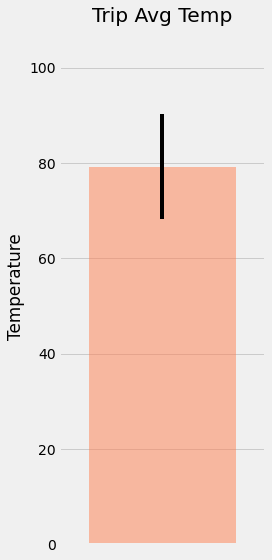

In [56]:
# Plot the results from the previous query as a bar chart. 
# Use "Trip Avg Temp" as the bar chart Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
tmin=72.0
tavg=79.25
tmax=83.0
figure, ax = plt.subplots(figsize=plt.figaspect(2.))
xpos = 1
errors = tmax-tmin
bar = ax.bar(xpos, tavg, yerr=errors, alpha=0.5, color='coral', align="center")
ax.set(xticks=range(xpos),title="Trip Avg Temp", ylabel="Temperature")
ax.margins(.2, .2)
figure.tight_layout()
plt.show

### Daily Rainfall Average

In [11]:
#setup the start/end date
start_date=dt.date(2017,8,1)
end_date=dt.date(2017,8,7)
#call the selected data from session
sel=[Measurement.date,Measurement.station,Measurement.prcp,Station.name,Station.latitude,Station.longitude,Station.elevation]
trip_precipitation=session.query(*sel).\
        filter(Measurement.station==Station.station).\
        filter(Measurement.date>=start_date).\
        filter(Measurement.date<=end_date).all()
trip_precipitation

[('2017-08-01',
  'USC00519397',
  0.02,
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0),
 ('2017-08-02',
  'USC00519397',
  0.0,
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0),
 ('2017-08-03',
  'USC00519397',
  0.0,
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0),
 ('2017-08-04',
  'USC00519397',
  0.02,
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0),
 ('2017-08-05',
  'USC00519397',
  0.0,
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0),
 ('2017-08-06',
  'USC00519397',
  0.0,
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0),
 ('2017-08-07',
  'USC00519397',
  0.0,
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0),
 ('2017-08-01',
  'USC00514830',
  0.12,
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 ('2017-08-02',
  'USC00514830',
  0.05,
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 ('2017-08-03',
  'USC00514830',
  0.01,
  'KUALOA RANCH HEADQUARTERS 886.9, H

In [12]:
# set the result as a dataframe
trip_precipitation=pd.DataFrame(trip_precipitation)
trip_precipitation.head()

,date,station,prcp,name,latitude,longitude,elevation
0,2017-08-01,USC00519397,0.02,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2017-08-02,USC00519397,0.00,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,2017-08-03,USC00519397,0.00,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,2017-08-04,USC00519397,0.02,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,2017-08-05,USC00519397,0.00,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


In [13]:
# group by the station, name, latitude, longitude, and elevation, and sum up the prcp
grouped_stations=trip_precipitation.groupby(["station","latitude","longitude","elevation"]).agg({"prcp":sum})
# reset the index
grouped_stations=grouped_stations.reset_index()
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
grouped_stations=grouped_stations.sort_values(by=["prcp"],ascending=False)
grouped_stations

,station,latitude,longitude,elevation,prcp
1,USC00516128,21.33310,-157.80250,152.4,0.36
0,USC00514830,21.52130,-157.83740,7.0,0.22
2,USC00519281,21.45167,-157.84889,32.9,0.06
3,USC00519397,21.27160,-157.81680,3.0,0.04
4,USC00519523,21.33556,-157.71139,19.5,0.00


In [14]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [15]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates

# start_end=session.query(Measurement.date,Measurement.prcp).\
#         filter(Measurement.date>=start_date).\
#         filter(Measurement.date<=end_date).all()
# start_end
# Strip off the year and save a list of strings in the format %m-%d


# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.


In [16]:
# Use the start and end date to create a range of dates

start_end=session.query(Measurement.date,Measurement.prcp).\
        filter(Measurement.date>=start_date).\
        filter(Measurement.date<=end_date).all()
start_end=pd.DataFrame(start_end)
start_end

,date,prcp
0,2017-08-01,0.02
1,2017-08-02,0.00
2,2017-08-03,0.00
3,2017-08-04,0.02
4,2017-08-05,0.00
5,2017-08-06,0.00
6,2017-08-07,0.00
7,2017-08-01,0.12
8,2017-08-02,0.05
9,2017-08-03,0.01


In [17]:
# convert date from string to datetime format
start_end['date'] = pd.to_datetime(start_end['date'])

In [18]:
# Strip off the year and save a list of strings in the format %m-%d
converted_df= start_end['date'].apply(lambda x: x.strftime('%m-%d'))
converted_df.head()

0    08-01
1    08-02
2    08-03
3    08-04
4    08-05
Name: date, dtype: object

In [19]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals=[]
for row in converted_df:
    normals.append(daily_normals(row))
normals

[[(67.0, 75.54, 83.0)],
 [(68.0, 75.60377358490567, 84.0)],
 [(70.0, 76.61111111111111, 85.0)],
 [(69.0, 76.71153846153847, 84.0)],
 [(69.0, 76.14814814814815, 82.0)],
 [(67.0, 76.25, 83.0)],
 [(71.0, 77.15686274509804, 83.0)],
 [(67.0, 75.54, 83.0)],
 [(68.0, 75.60377358490567, 84.0)],
 [(70.0, 76.61111111111111, 85.0)],
 [(69.0, 76.71153846153847, 84.0)],
 [(67.0, 76.25, 83.0)],
 [(71.0, 77.15686274509804, 83.0)],
 [(67.0, 75.54, 83.0)],
 [(68.0, 75.60377358490567, 84.0)],
 [(70.0, 76.61111111111111, 85.0)],
 [(69.0, 76.71153846153847, 84.0)],
 [(67.0, 76.25, 83.0)],
 [(71.0, 77.15686274509804, 83.0)],
 [(69.0, 76.71153846153847, 84.0)],
 [(69.0, 76.14814814814815, 82.0)],
 [(67.0, 76.25, 83.0)],
 [(67.0, 75.54, 83.0)],
 [(68.0, 75.60377358490567, 84.0)],
 [(70.0, 76.61111111111111, 85.0)],
 [(69.0, 76.14814814814815, 82.0)],
 [(67.0, 76.25, 83.0)],
 [(71.0, 77.15686274509804, 83.0)]]

In [20]:
# remove the extra [] from normals
normals=sum(normals,[])
normals

[(67.0, 75.54, 83.0),
 (68.0, 75.60377358490567, 84.0),
 (70.0, 76.61111111111111, 85.0),
 (69.0, 76.71153846153847, 84.0),
 (69.0, 76.14814814814815, 82.0),
 (67.0, 76.25, 83.0),
 (71.0, 77.15686274509804, 83.0),
 (67.0, 75.54, 83.0),
 (68.0, 75.60377358490567, 84.0),
 (70.0, 76.61111111111111, 85.0),
 (69.0, 76.71153846153847, 84.0),
 (67.0, 76.25, 83.0),
 (71.0, 77.15686274509804, 83.0),
 (67.0, 75.54, 83.0),
 (68.0, 75.60377358490567, 84.0),
 (70.0, 76.61111111111111, 85.0),
 (69.0, 76.71153846153847, 84.0),
 (67.0, 76.25, 83.0),
 (71.0, 77.15686274509804, 83.0),
 (69.0, 76.71153846153847, 84.0),
 (69.0, 76.14814814814815, 82.0),
 (67.0, 76.25, 83.0),
 (67.0, 75.54, 83.0),
 (68.0, 75.60377358490567, 84.0),
 (70.0, 76.61111111111111, 85.0),
 (69.0, 76.14814814814815, 82.0),
 (67.0, 76.25, 83.0),
 (71.0, 77.15686274509804, 83.0)]

In [21]:
# set the result into a dataframe
df=pd.DataFrame(normals,columns=["min","avg","max"])
df.head()

,min,avg,max
0,67.0,75.540000,83.0
1,68.0,75.603774,84.0
2,70.0,76.611111,85.0
3,69.0,76.711538,84.0
4,69.0,76.148148,82.0


In [22]:
# Join the date with the result
joined_df=start_end.join(df, lsuffix="_left", rsuffix="_right")
joined_df=joined_df[["date","min","avg","max"]].set_index(["date"])
joined_df.head()

,min,avg,max
date,,,
2017-08-01,67.0,75.540000,83.0
2017-08-02,68.0,75.603774,84.0
2017-08-03,70.0,76.611111,85.0
2017-08-04,69.0,76.711538,84.0
2017-08-05,69.0,76.148148,82.0


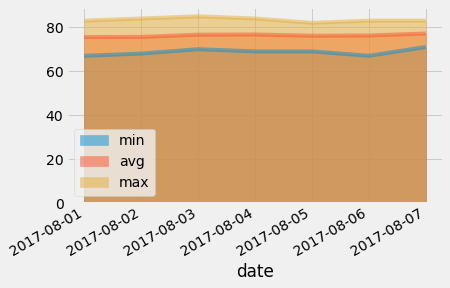

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
joined_df.plot.area(stacked=False)

## Close Session

In [24]:
# Close Session
session.close()